# Importing Required Dependencies

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


# Data Collection and Pre-Processing

In [28]:
spam_mail_data = pd.read_csv('./Dataset/Spam_Mail_dataset.csv')

In [29]:
spam_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
spam_mail_data.isnull().sum()

# since we are having non numerical values it will not work

Category    0
Message     0
dtype: int64

In [31]:
print(spam_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [32]:
# Replace the Null values with the null string

new_mail_data = spam_mail_data.where((pd.notnull(spam_mail_data)), '')

In [33]:
print(new_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [34]:
# Printing first five rows

new_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
# No of rows and cols - Checking our dataset size

new_mail_data.shape

(5572, 2)

# Label Encoding

In [36]:
# Label Spam mail --> 0   and Ham mail  -->1

new_mail_data.loc[new_mail_data['Category'] == 'spam', 'Category',] = 0
new_mail_data.loc[new_mail_data['Category'] == 'ham', 'Category',] = 1

In [37]:
print(new_mail_data)

     Category                                            Message
0           1  Go until jurong point, crazy.. Available only ...
1           1                      Ok lar... Joking wif u oni...
2           0  Free entry in 2 a wkly comp to win FA Cup fina...
3           1  U dun say so early hor... U c already then say...
4           1  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567        0  This is the 2nd time we have tried 2 contact u...
5568        1               Will ü b going to esplanade fr home?
5569        1  Pity, * was in mood for that. So...any other s...
5570        1  The guy did some bitching but I acted like i'd...
5571        1                         Rofl. Its true to its name

[5572 rows x 2 columns]


spam --> 0  <br>
ham --> 1

# Seperating Feature and Target

In [38]:
# Seperating the data as text and labels

X = new_mail_data['Message']
Y = new_mail_data['Category']

In [39]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [40]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# Splitting the data into Training and Testing Data

In [41]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3, test_size=0.2)

In [42]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Now we need to convert all text data into numerical values so that our model can understand it

# Feature Extraction

In [47]:
# Transform the text data to Feature Vectors that can be used as input to the logistic regresison model

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Converting X_train and X_test ( we don't need to convert Y_train and Y_test as it is already in numerical values)

X_train_features = feature_extraction.fit_transform(X_train)  # Fitting and Transforming X_train

X_test_features = feature_extraction.transform(X_test)  # We will not fit our data for test data we only do that for train data

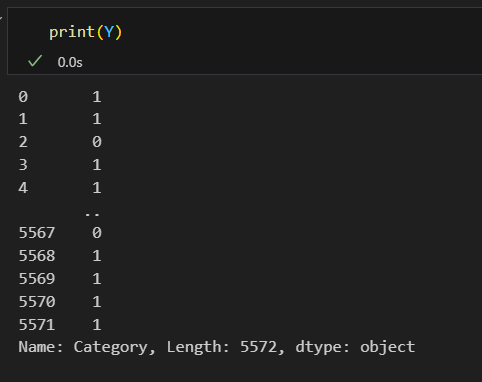

In [48]:
# Converting Y_train and Y_test values as integer bcz current dtype: object

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [49]:
print(Y_train)

3075    1
1787    1
1614    1
4304    1
3266    0
       ..
789     0
968     1
1667    1
3321    1
1688    0
Name: Category, Length: 4457, dtype: int64


In [50]:
print(Y_test)

2632    0
454     1
983     0
1282    1
4610    1
       ..
4827    1
5291    1
3325    1
3561    1
1136    1
Name: Category, Length: 1115, dtype: int64


In [51]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [52]:
print(X_test_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7687 stored elements and shape (1115, 7431)>
  Coords	Values
  (0, 1)	0.2381316303003606
  (0, 9)	0.2852706805264544
  (0, 14)	0.26797874471323896
  (0, 20)	0.30668032384591537
  (0, 306)	0.23975986557206702
  (0, 405)	0.2381316303003606
  (0, 1041)	0.28016206931555726
  (0, 1082)	0.2451068436245027
  (0, 1361)	0.25132445289897426
  (0, 1405)	0.3176863938914351
  (0, 1549)	0.2646498848307188
  (0, 4386)	0.18353336340308998
  (0, 5213)	0.1988547357502182
  (0, 5373)	0.2365698724638063
  (0, 6920)	0.20571591693537986
  (0, 7271)	0.1940327008179069
  (1, 3491)	0.496093956101028
  (1, 4418)	0.3457696891316818
  (1, 4729)	0.22965776503163893
  (1, 6214)	0.3621564482127515
  (1, 6507)	0.26731535902873493
  (1, 6588)	0.3298937975962767
  (1, 6732)	0.42473488678029325
  (1, 7368)	0.29957800964520975
  (2, 201)	0.2824102268489399
  :	:
  (1110, 6591)	0.7327660015422193
  (1111, 2440)	0.4137350055985486
  (1111, 3227)	0.44384935772735

# Training the Model ( Logistic Regression )

In [54]:
model = LogisticRegression()

In [55]:
# Training the logistic regression model with the training data

model.fit(X_train_features, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


our model now trained